In [1]:
# Supervised learning :- predictive modeling , train and test(random sampling)
# Unsupervised learning :- no target variable (no predictive modeling), no random sampling is needed
#                       :- Kmeans , hiear clustering , PCA(Principal component analysis--> is no ml model --> used to redused diamension)
#                       :- DBSCAN  AND t-SNE not in sylabus

In [2]:
# Whats need of any unsupervised model? 
# ex
# Age     gender  salary range        shopping pattern  profession  no of time visits shopping    mo.no




# its not possible to design a strategy for any individual customer -> why we make cluster ans is that
# group the customers based on similarity and for each group u make a strategy --> cluster 

In [3]:
# K-means :- unsupervised learning algorithm --> cluster are forms on base of similarity (by ecliudean distance)-- iterative model
#     1)How k means works:- 
# ex ) 
#  Age :-   30 20 50 55 54 32 22 29 60 63 45 21 29 33 37 47 65 72 42 35 28 46 56 39
# we have need to make atleast 2 cluster -->  
# iterative model :- 1st iteration centroids are randomly assigned
#                 :- in 2nd and 3 rd iteration centroid are calculated and set accordlingly mean of that cluster
#                 :- after that some records come in cluster 1st and some 2nd and then repeate that process 
#                 :- after some time model has converged
#                 :- in large dataset mean may not be 100% fixed 
#     2) how to find  k in kmeans --> k is number of cluster 
#     --> we find the mean and then take difference between record and mean and then square of it and do sum of that is the ssd
#     --> graph of on x axis is k and on y axis ssd that graph is called elbow plot
#     --> elbow used to find the value of k --> where is value stop decrease and make stable that is optimal value of k

In [4]:
import pandas as pd

In [5]:
sns=pd.read_csv("D:\Imarticus Learning\DATASETS\snsdata.csv")

In [6]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
sns.shape

(30000, 40)

In [8]:
sns.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
sns.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [10]:
sns.gender.fillna('F',inplace=True)
sns.age.fillna(sns.age.mean(),inplace=True)

In [11]:
sns.gender.replace({'M':0,'F':1},inplace = True)

In [50]:
from sklearn.cluster import KMeans
km_sns = KMeans(n_clusters=3) # by defualt cluster is 8
km_sns.fit(sns) # model has been created

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [51]:
import numpy as np
np.unique(km_sns.labels_)

array([0, 1, 2])

In [52]:
pd.Series(km_sns.labels_).value_counts()  # gives the count of records in each cluster

1    19575
0     8995
2     1430
dtype: int64

In [53]:
km_sns.cluster_centers_  # gives the cluster center

array([[2.00757810e+03, 8.52473596e-01, 1.79057490e+01, 5.52937187e+01,
        3.11284047e-01, 2.82934964e-01, 2.58143413e-01, 2.18343524e-01,
        1.76209005e-01, 1.57531962e-01, 1.21845470e-01, 1.17065036e-01,
        9.46081156e-02, 1.55864369e-01, 3.76097832e-01, 2.11006115e-01,
        1.52751529e-01, 1.42190106e-01, 1.14063369e-01, 4.92829350e-01,
        3.31295164e-01, 4.88048916e-02, 7.81767649e-01, 2.66147860e-01,
        5.36075598e-01, 3.05058366e-01, 1.37409672e-01, 2.32351306e-02,
        4.51695386e-01, 1.29405225e-01, 1.32962757e-01, 2.97943302e-01,
        4.19344080e-01, 1.62201223e-01, 9.00500278e-02, 6.44802668e-02,
        1.92440245e-01, 1.26959422e-01, 8.97165092e-02, 5.96998332e-02],
       [2.00745098e+03, 8.07765006e-01, 1.80538039e+01, 1.05059004e+01,
        2.38978289e-01, 2.35453384e-01, 2.04750958e-01, 1.28275862e-01,
        1.23780332e-01, 1.22452107e-01, 9.27713921e-02, 9.72669221e-02,
        8.34738186e-02, 1.32669221e-01, 2.87458493e-01, 2.07203

In [54]:
# Each array over here represent 1 point 

In [55]:
sns_centers= pd.DataFrame(km_sns.cluster_centers_)
sns_centers.columns = sns.columns

In [56]:
sns_centers

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.578099,0.852474,17.905749,55.293719,0.311284,0.282935,0.258143,0.218344,0.176209,0.157532,...,0.132963,0.297943,0.419344,0.162201,0.090050,0.064480,0.192440,0.126959,0.089717,0.059700
1,2007.450983,0.807765,18.053804,10.505900,0.238978,0.235453,0.204751,0.128276,0.123780,0.122452,...,0.080511,0.226973,0.312133,0.140536,0.055990,0.041584,0.178442,0.106513,0.084853,0.061660
2,2007.679720,0.907692,17.729415,141.513287,0.379021,0.290210,0.246853,0.252448,0.200000,0.152448,...,0.137063,0.418182,0.495105,0.171329,0.132867,0.098601,0.209091,0.139860,0.119580,0.048252


In [57]:
# find the value of k ?  --> Eblow plot 
km_sns.score(sns)

-11298600.067657596

In [58]:
ssd_list=[]
for k in range(1,11):
    km_sns = KMeans(n_clusters=k) # by defualt cluster is 8
    km_sns.fit(sns)
    ssd_list.append(np.abs(km_sns.score(sns)))
    print(k)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


In [59]:
ssd_list

[42274974.92283419,
 18611355.303126708,
 11294903.63787589,
 8111437.0130946,
 6334531.664315582,
 5075063.748063731,
 4021803.065917587,
 3101556.51816033,
 2564789.8618633496,
 2219462.9475633893]

In [60]:
cluster =  list(range(1,11))
cluster

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
import matplotlib.pyplot as plt

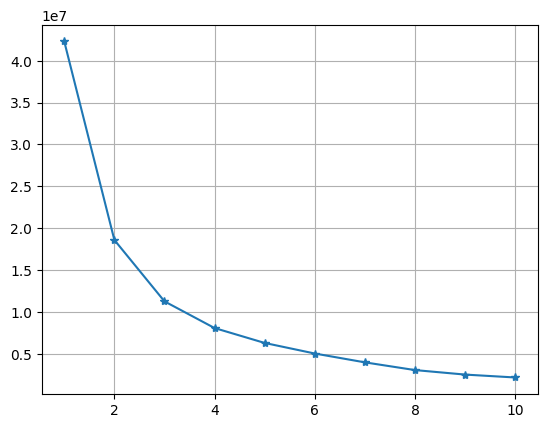

In [62]:
plt.plot(cluster,ssd_list,marker="*")
plt.grid()

In [63]:
# some part is remaining here 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [64]:
y_predict = km_sns.fit_predict(sns)
centroids = km_sns.cluster_centers_
silhouette_vals = silhouette_samples(sns,y_predict)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
#sil score for each record
silhouette_vals

array([0.45142826, 0.54151523, 0.0255818 , ..., 0.69357083, 0.70562986,
       0.64109557])

In [66]:
silhouette_vals[silhouette_vals<0]

array([-0.00836802, -0.00305631, -0.00286332, -0.07264438])

In [67]:
len(silhouette_vals[silhouette_vals<0])

4